<a href="https://colab.research.google.com/github/josegarsia/AI_2024/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project.- Training a Machine Learning model on medical images.

Personal Information

Name: José Bernardo García Salazar

ID: 2023083

Career: Biomedical Engineering

Group: 001

Class: Artificial Intelligence

Professor: Daniel Isaías López Páez

Hour: Thursday N4-N6

This model is going to predict the clasification of the image

# Import Libraries


In [2]:
# General Libraries
import pandas as pd                    # Data manipulation and analysis library
import numpy as np                     # Numerical computing library
import keras                           # High-level neural networks API
import warnings                        # Control over warnings emitted by Python
import matplotlib.pyplot as plt        # Plotting library
import seaborn as sns                  # Data visualization library based on matplotlib
import random                          # Generate pseudo-random numbers
import time                            # Time-related functions

# Path Process
import os                              # Operating system interfaces
import os.path                         # Common pathname manipulations
from pathlib import Path               # Object-oriented filesystem paths
import glob                            # Unix style pathname pattern expansion
from scipy.io import loadmat           # Read .mat files
import nibabel as nib                  # Access a wide range of neuroimaging file formats
import csv                             # CSV file reading and writing

# Image Process
import cv2                             # OpenCV library for computer vision tasks
from PIL import Image                  # Python Imaging Library for opening, manipulating, and saving many different image file formats
from keras.preprocessing import image  # Image preprocessing utilities
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generate batches of tensor image data with real-time data augmentation
from keras.models import Sequential    # Sequential model API
from keras.layers import Dense, Dropout, Flatten  # Dense and Dropout layers for neural networks
from keras.layers import Conv2D, MaxPooling2D      # Convolutional and pooling layers for 2D images
from keras.applications.vgg16 import preprocess_input, decode_predictions  # Preprocessing functions for VGG16 model
from skimage.feature import hessian_matrix, hessian_matrix_eigvals           # Functions for computing Hessian matrix
from scipy.ndimage.filters import convolve                                  # Multi-dimensional image processing functions
from skimage import data, io, filters                                       # Image processing functions from scikit-image
import skimage                        # Image processing library
from skimage.morphology import convex_hull_image, erosion                    # Morphological operations on binary images
from IPython import display          # Interactive computing in Python

from scipy.ndimage import gaussian_filter  # Multidimensional Gaussian filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection  # Plotting 3D collections
import matplotlib.patches as patches                   # Functions for creating patch objects

# Scaler, Transformation and Accuracy Control
from sklearn.preprocessing import StandardScaler     # Standardize features by removing the mean and scaling to unit variance
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, mean_squared_error, r2_score  # Model evaluation metrics
from sklearn.preprocessing import MinMaxScaler       # Scale features to a range
from keras.utils import to_categorical               # Convert class vector to binary class matrix
import tensorflow as tf                              # TensorFlow machine learning library
from keras import backend as K                        # Keras backend module
from keras.utils import plot_model                   # Plot model architecture as a graph
from keras import regularizers                        # Regularization techniques for neural networks
from keras.optimizers import RMSprop, Adam, SGD, Adamax      # Optimizers for training neural networks
from tensorflow.keras.models import Sequential, Model  # Sequential and Functional API for building models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, MaxPooling2D, BatchNormalization, Permute, TimeDistributed, Bidirectional, GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D, Reshape, Conv2DTranspose, LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate  # Layers for building neural networks
from tensorflow.keras.applications import VGG19, VGG19, inception_v3  # Pretrained models available in Keras
from tensorflow.keras.optimizers import Adam         # Adam optimizer
from tensorflow.keras.losses import SparseCategoricalCrossentropy  # Loss function for multi-class classification problems
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping  # Callbacks for training neural networks
import sklearn.metrics as metrics                    # Metrics for evaluating model performance
from keras.callbacks import LearningRateScheduler    # Callback to schedule learning rate changes during training
!pip install visualkeras
import visualkeras         #To visualize our CNNs

# IGNORING WARNINGS
from warnings import filterwarnings                # Filter warnings module
filterwarnings("ignore", category=DeprecationWarning)  # Ignore deprecation warnings
filterwarnings("ignore", category=FutureWarning)        # Ignore future warnings
filterwarnings("ignore", category=UserWarning)          # Ignore user warnings

<ipython-input-2-a72a4cd9137b>:30: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve                                  # Multi-dimensional image processing functions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 51.1 MB/s eta 0:00:00




# Import data


In [3]:
!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset
!unzip augmented-alzheimer-mri-dataset.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: OriginalDataset/NonDemented/31 (10).jpg  
  inflating: OriginalDataset/NonDemented/31 (100).jpg  
  inflating: OriginalDataset/NonDemented/31 (11).jpg  
  inflating: OriginalDataset/NonDemented/31 (12).jpg  
  inflating: OriginalDataset/NonDemented/31 (13).jpg  
  inflating: OriginalDataset/NonDemented/31 (14).jpg  
  inflating: OriginalDataset/NonDemented/31 (15).jpg  
  inflating: OriginalDataset/NonDemented/31 (16).jpg  
  inflating: OriginalDataset/NonDemented/31 (17).jpg  
  inflating: OriginalDataset/NonDemented/31 (18).jpg  
  inflating: OriginalDataset/NonDemented/31 (19).jpg  
  inflating: OriginalDataset/NonDemented/31 (2).jpg  
  inflating: OriginalDataset/NonDemented/31 (20).jpg  
  inflating: OriginalDataset/NonDemented/31 (21).jpg  
  inflating: OriginalDataset/NonDemented/31 (22).jpg  
  inflating: OriginalDataset/NonDemented/31 (23).jpg  
  inflating: OriginalDataset/NonDemented/31 (24).jpg 

In [4]:
# Defining paths to different categories of images
mild_demented_path = r'/content/OriginalDataset/MildDemented'
moderate_demented_path = r'/content/OriginalDataset/ModerateDemented'
non_demented_path = r'/content/OriginalDataset/NonDemented'
very_mild_demented_path = r'/content/OriginalDataset/VeryMildDemented'

# Lists to store file paths and corresponding labels
filepaths = []  # List to store file paths
labels = []  # List to store labels

# List of paths and corresponding labels
path_label_dict_list = [mild_demented_path, moderate_demented_path, non_demented_path, very_mild_demented_path]
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very Mild Demented']

# Looping through each category and extracting file paths and labels
for i, path in enumerate(path_label_dict_list):
    file_list = os.listdir(path)  # List of files in the directory
    for file in file_list:
        file_path = os.path.join(path, file)  # Full path of the file
        filepaths.append(file_path)  # Appending file path to the list
        labels.append(class_labels[i])  # Appending corresponding label to the list

# Creating Pandas Series for file paths and labels
filepaths_series = pd.Series(filepaths, name="filepaths")  # Series for file paths
labels_series = pd.Series(labels, name="labels")  # Series for labels

# Concatenating file paths and labels into a DataFrame
alzheimer_data = pd.concat([filepaths_series, labels_series], axis=1)  # Concatenating series into DataFrame
alzheimer_df = pd.DataFrame(alzheimer_data)  # Creating DataFrame from the concatenated data

In [5]:
# Split the Alzheimer_df dataset into train and test sets with a test size of 20% and a fixed random state for reproducibility
train_images, test_images = train_test_split(alzheimer_df, test_size=0.3, random_state=42)

# Further split the Alzheimer_df dataset into train and validation sets with a test size of 20% and the same random state as before
train_set, val_set = train_test_split(alzheimer_df, test_size=0.2, random_state=42)

In [6]:
# Initialize an ImageDataGenerator with preprocessing function for MobileNetV2
image_data_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

# Generate train data flow from DataFrame
train_data_flow = image_data_generator.flow_from_dataframe(
    dataframe=train_set,
    x_col="filepaths",
    y_col="labels",
    target_size=(244, 244),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)

# Generate test data flow from DataFrame
test_data_flow = image_data_generator.flow_from_dataframe(
    dataframe=test_images,
    x_col="filepaths",
    y_col="labels",
    target_size=(244, 244),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)

# Generate validation data flow from DataFrame
validation_data_flow = image_data_generator.flow_from_dataframe(
    dataframe=val_set,
    x_col="filepaths",
    y_col="labels",
    target_size=(244, 244),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)

Found 5120 validated image filenames belonging to 4 classes.
Found 1920 validated image filenames belonging to 4 classes.
Found 1280 validated image filenames belonging to 4 classes.


# Visualize Data

In [7]:
classes=list(train_data_flow.class_indices.keys())

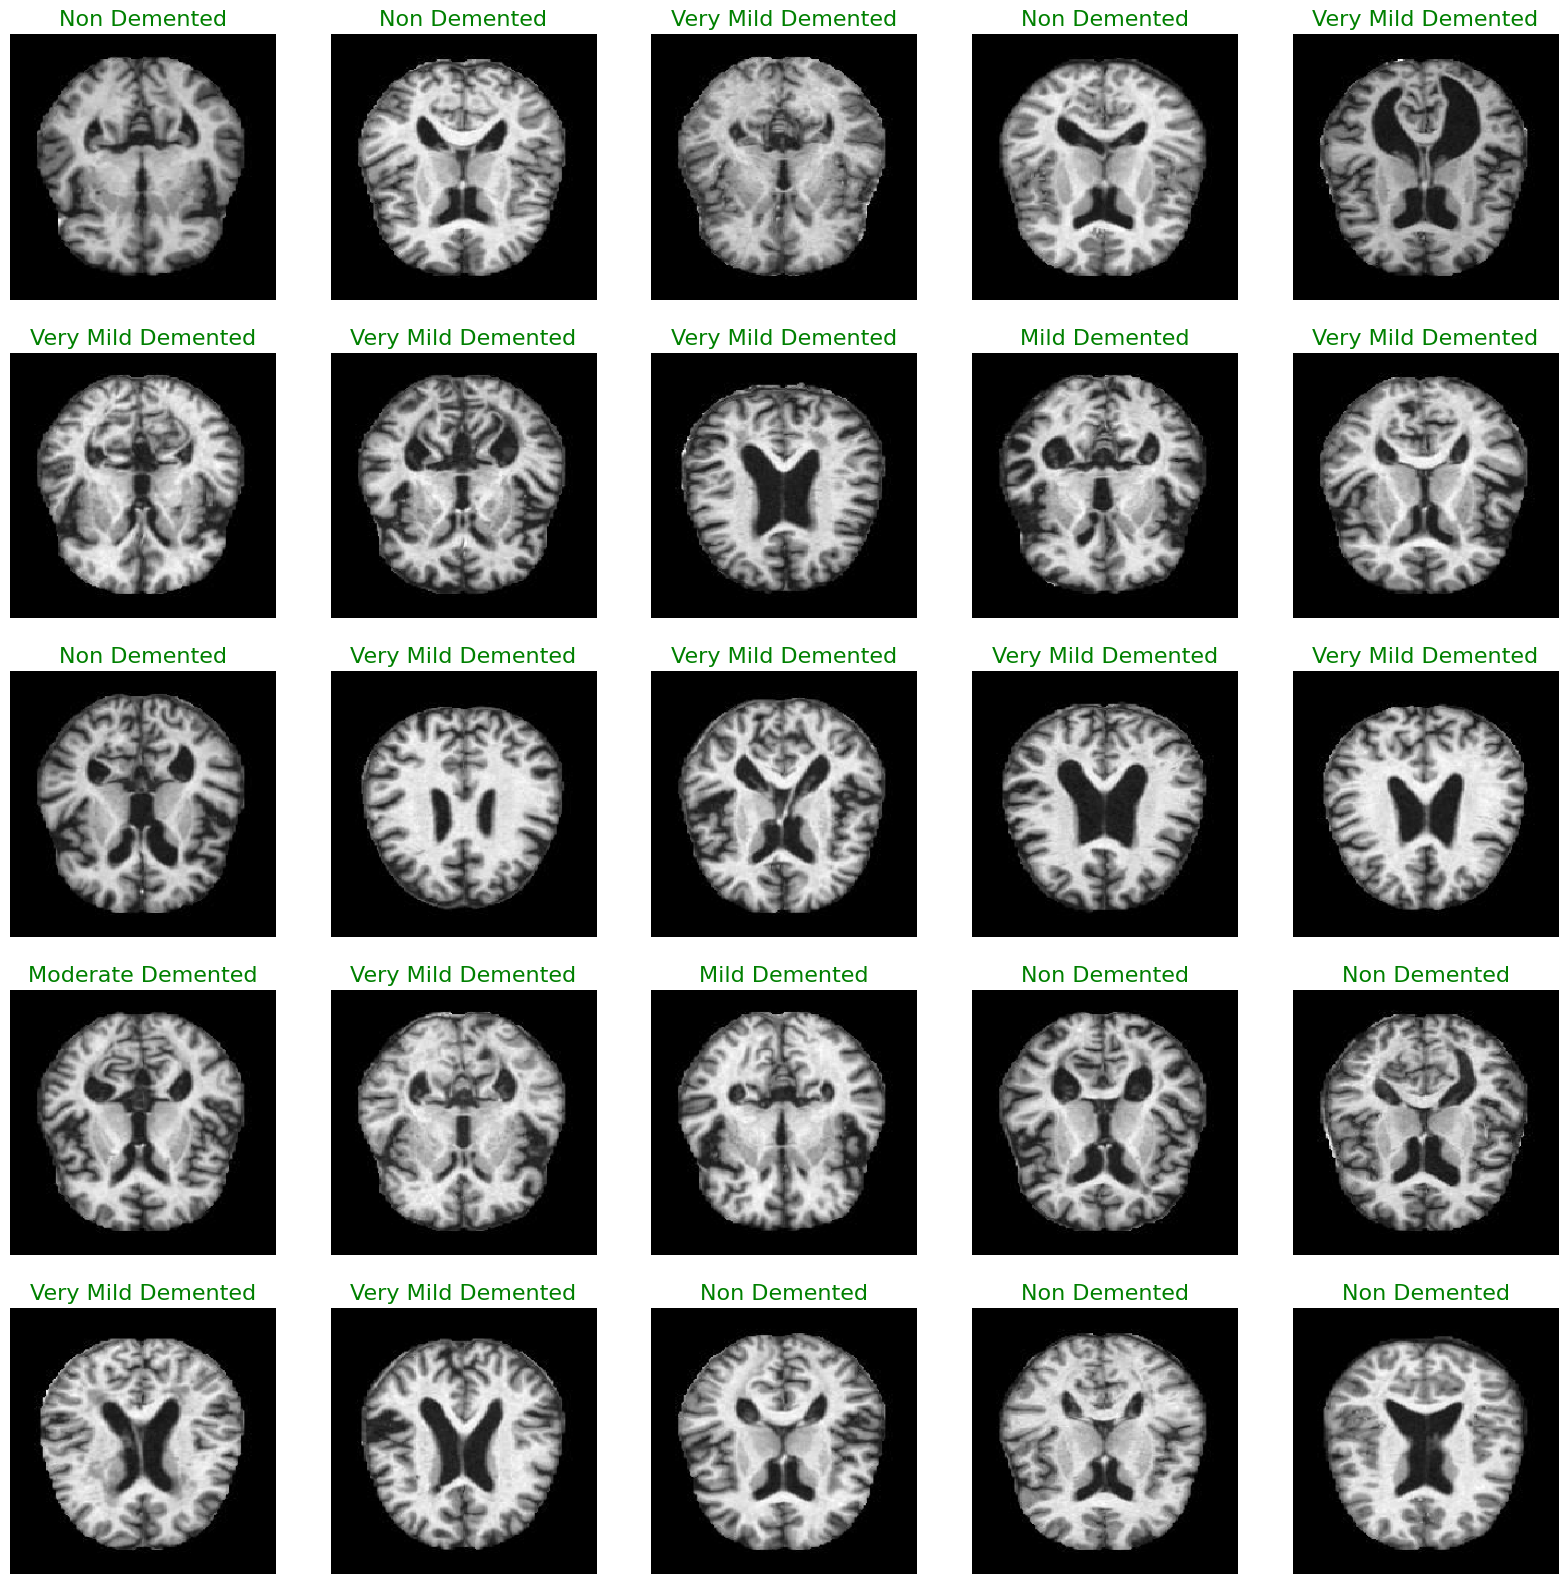

In [8]:
def display_sample_images(image):
    # Extract class indices from the test set
    class_dict = test_data_flow.class_indices
    # Get the list of class names
    classes = list(class_dict.keys())
    # Get a batch of images and their labels from the generator
    images, labels = next(image)

    # Set up the plot for displaying images
    plt.figure(figsize=(20, 20))
    length = len(labels)

    # Determine the number of images to display, maximum 25
    if length < 25:
        num_images = length
    else:
        num_images = 25

    # Iterate through the images and display them
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        # Scale images between 0 and 1
        image = (images[i] + 1) / 2
        plt.imshow(image)
        # Get the index of the predicted class
        index = np.argmax(labels[i])
        # Get the class name corresponding to the index
        class_name = classes[index]
        plt.title(class_name, color="green", fontsize=16)
        plt.axis('off')

    # Show the plot with the images
    plt.savefig('VisualizeData_Clasification.jpeg')
    plt.show()

#Call the function
display_sample_images(train_data_flow)

# Create Architecture

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

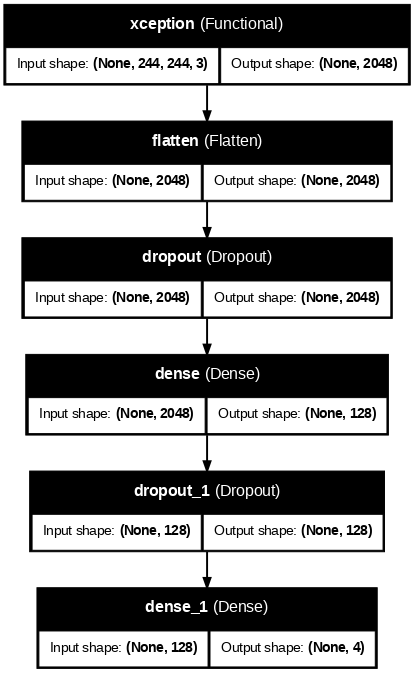

In [9]:
# Defining the shape of the input images
image_shape = (244, 244, 3)

# Loading the pre-trained Xception model from Keras applications
base_model = tf.keras.applications.Xception(
    include_top=False,  # Excludes the top (final) layer of the model
    weights="imagenet",  # Initializes the model with pre-trained ImageNet weights
    input_shape=image_shape,  # Shape of input images expected by the model
    pooling='max'  # Global max pooling operation for feature extraction
)

# Creating a Sequential model by stacking layers
ModelDiagnostic = Sequential([
    base_model,  # Adding the Xception base model
    Flatten(),  # Flattening the output tensor from the base model
    Dropout(rate=0.3),  # Regularization by randomly setting input units to 0 with a frequency of 0.3
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    Dropout(rate=0.25),  # Regularization by randomly setting input units to 0 with a frequency of 0.25
    Dense(4, activation='softmax')  # Output layer with 4 neurons for classification using softmax activation
])

# Compiling the model with Adamax optimizer, categorical crossentropy loss, and accuracy metric
ModelDiagnostic.compile(
    optimizer=Adamax(learning_rate=0.001),  # Optimizer with a specific learning rate
    loss='categorical_crossentropy',  # Loss function for categorical classification
    metrics=['accuracy']  # Evaluation metric to monitor during training
)

# Printing the summary of the model architecture
ModelDiagnostic.summary()

# Building the model with a specified input shape
ModelDiagnostic.build(input_shape=(None, *image_shape))

# Plotting the model architecture0
tf.keras.utils.plot_model(
    ModelDiagnostic,
    to_file='Architecture_Classification.png',
    show_shapes=True,  # Displaying shapes of input/output tensors in the plot
    show_dtype=False,  # Hiding data types of tensors in the plot
    show_layer_names=True,  # Displaying names of layers in the plot
    rankdir='TB',  # Orientation of the plot (Top to Bottom)
    expand_nested=False,  # Flattening nested models for visualization
    dpi=70  # Dots per inch for the plot
)

# Training

In [10]:
# Training the model using the training data for 10 epochs and validating it after each epoch using the validation data.
# Saving the training history for analysis and monitoring.
training_history = ModelDiagnostic.fit(train_data_flow, epochs=5, validation_data=validation_data_flow, validation_freq=1)

Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 160s 615ms/step - accuracy: 0.5318 - loss: 1.0905 - val_accuracy: 0.5336 - val_loss: 0.9867
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 96s 601ms/step - accuracy: 0.7980 - loss: 0.4959 - val_accuracy: 0.7000 - val_loss: 1.3572
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 143s 606ms/step - accuracy: 0.9499 - loss: 0.1578 - val_accuracy: 0.7164 - val_loss: 1.3156
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 142s 607ms/step - accuracy: 0.9663 - loss: 0.0956 - val_accuracy: 0.8961 - val_loss: 0.3316
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 101s 629ms/step - accuracy: 0.9826 - loss: 0.0564 - val_accuracy: 0.9203 - val_loss: 0.2179


In [11]:
# Train the model with the given training data
training_history1 = ModelDiagnostic.fit(
    train_data_flow,        # The training data provided in a flow format
    epochs=1,               # Number of epochs (iterations over the entire dataset) to train the model
    validation_data=validation_data_flow,  # The validation data provided in a flow format
    validation_freq=1       # Frequency at which the model is evaluated on the validation data (after every epoch)
)

160/160 ━━━━━━━━━━━━━━━━━━━━ 97s 606ms/step - accuracy: 0.9855 - loss: 0.0452 - val_accuracy: 0.8313 - val_loss: 0.7330


In [12]:
# Evaluate the model's performance on the test data and print detailed results
ModelDiagnostic.evaluate(test_data_flow, verbose=1)

60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.8337 - loss: 0.7083


[0.6140625476837158, 0.854687511920929]

# Results

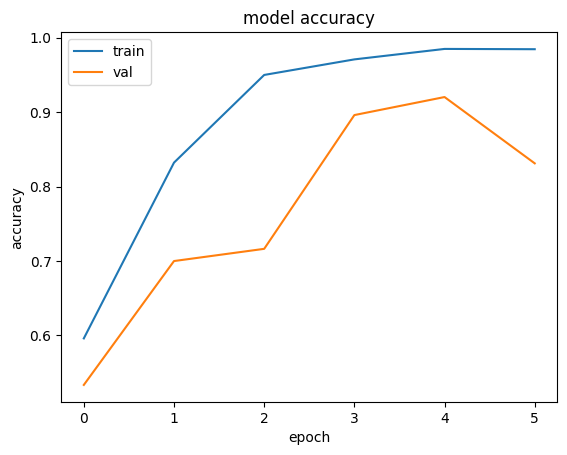

<Figure size 640x480 with 0 Axes>

In [13]:
plt.plot(training_history.history['accuracy'] + training_history1.history['accuracy'])
plt.plot(training_history.history['val_accuracy'] + training_history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('ModelAccuracy_Classification.jpeg')

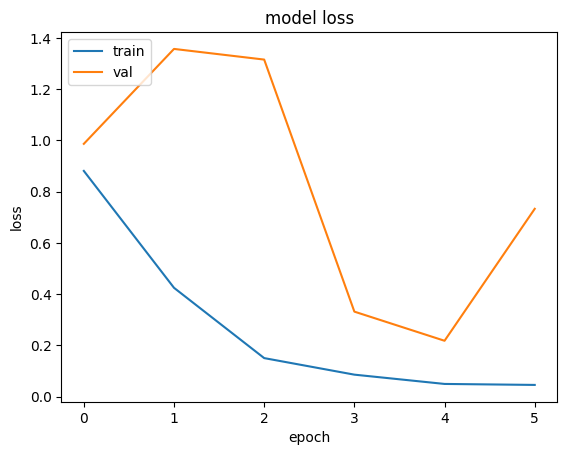

<Figure size 640x480 with 0 Axes>

In [14]:
plt.plot(training_history.history['loss'] + training_history1.history['loss'])
plt.plot(training_history.history['val_loss'] + training_history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('ModelLoss_Classification.jpeg')

In [15]:
pred = ModelDiagnostic.predict(test_data_flow)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train_data_flow.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step
                    precision    recall  f1-score   support

     Mild Demented       1.00      0.29      0.45       283
 Moderate Demented       1.00      0.60      0.75        15
      Non Demented       0.85      0.99      0.91       967
Very Mild Demented       0.85      0.90      0.88       655

          accuracy                           0.85      1920
         macro avg       0.92      0.70      0.75      1920
      weighted avg       0.87      0.85      0.83      1920

Accuracy of the Model: 85.5%


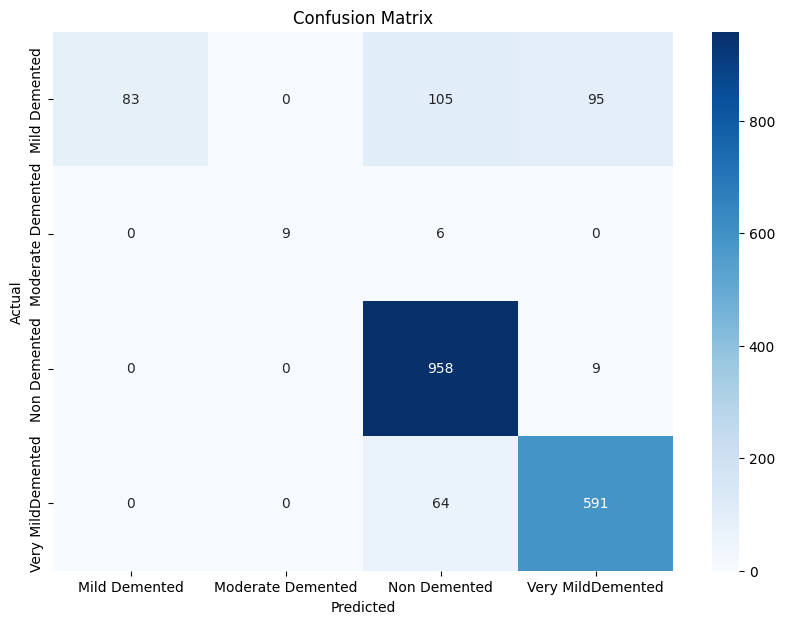

In [16]:
# Define the class labels
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred2)

# Create a figure and plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

# Set tick labels and axis labels
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Set the title
plt.title("Confusion Matrix")
plt.savefig('ConfusionMatrix_Classification.jpeg')

# Show the plot
plt.show()

# Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


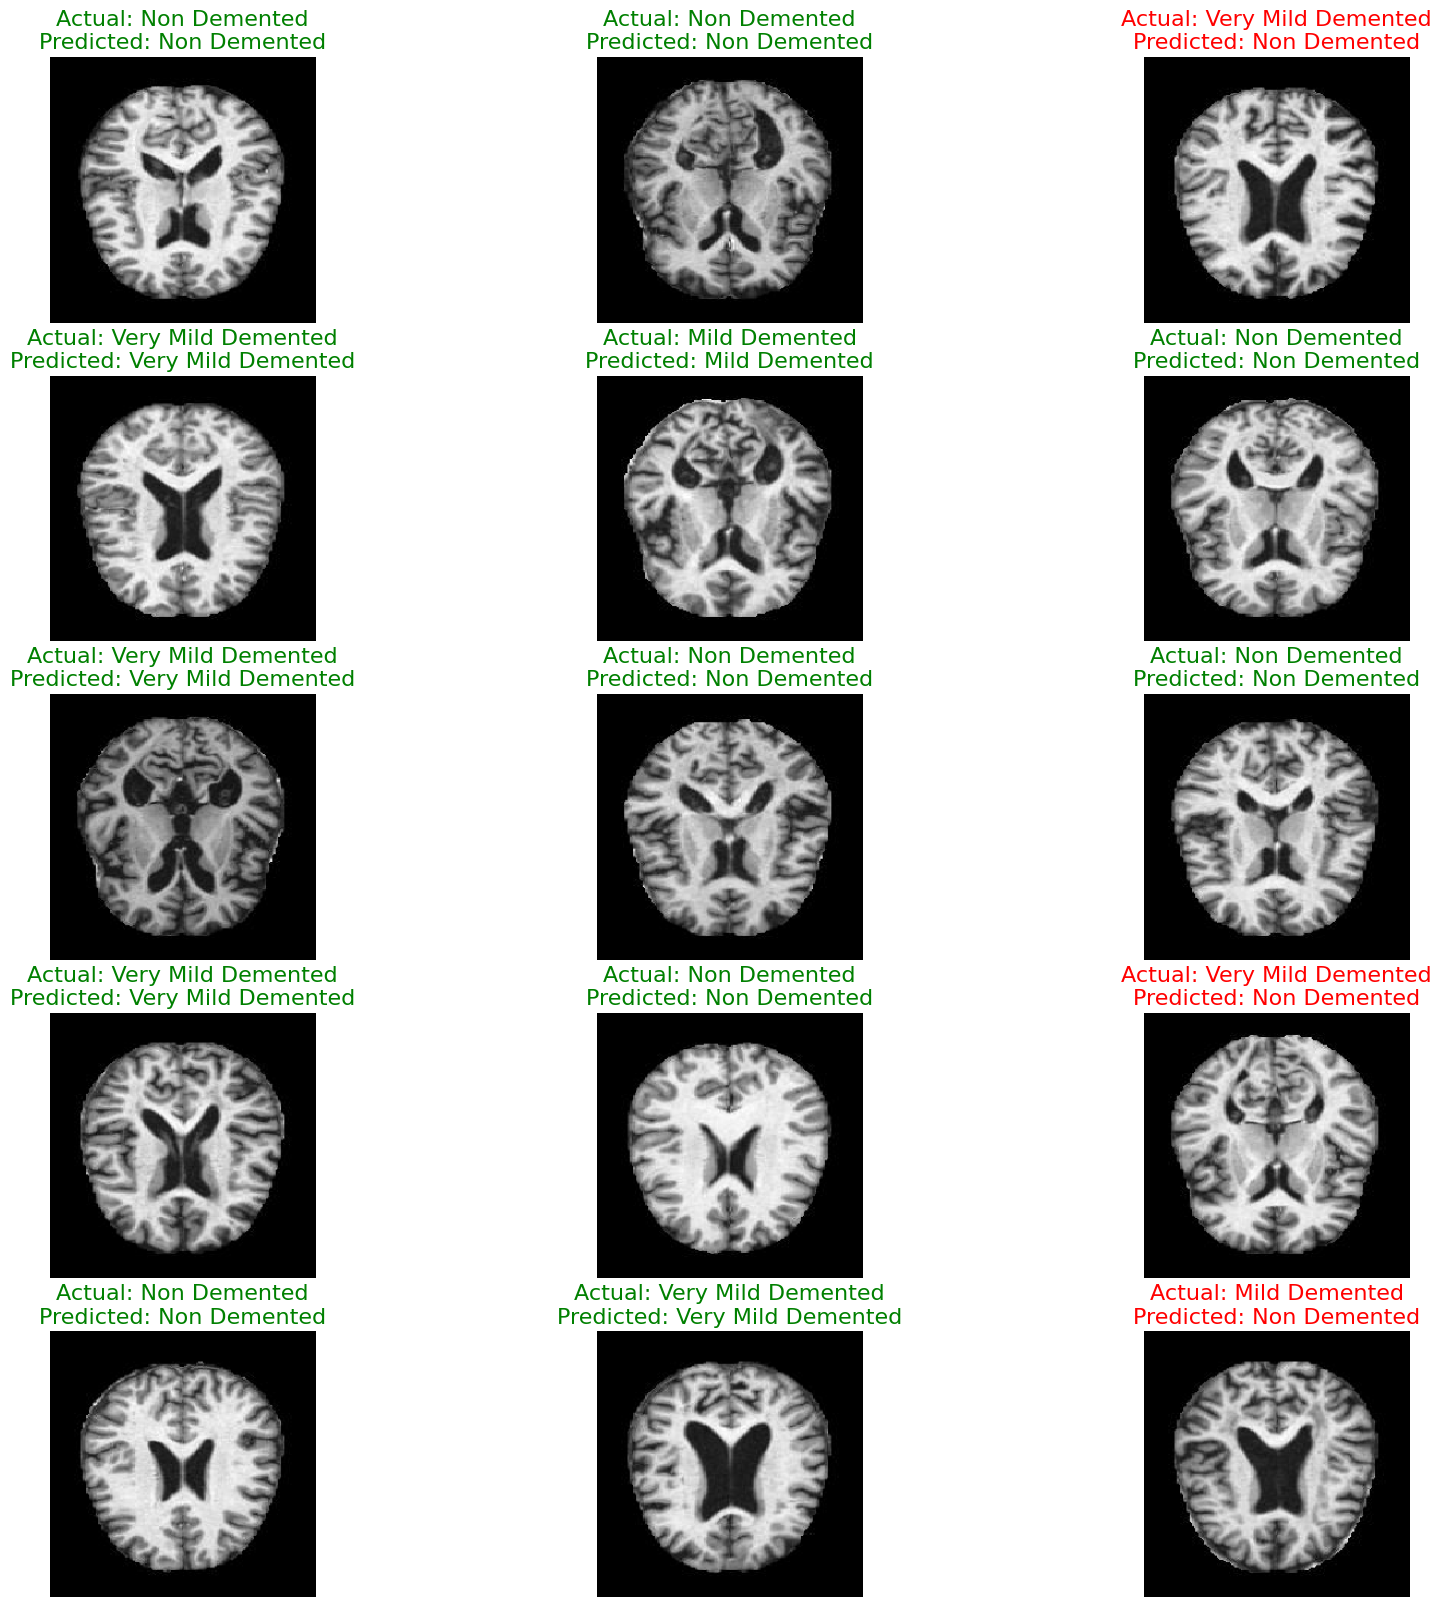

In [17]:
def display_Predict_images(image):
    # Extract class indices from the test set
    class_dict = test_data_flow.class_indices
    # Get the list of class names
    classes = list(class_dict.keys())
    # Get a batch of images and their labels from the generator
    images, labels = next(image)

    # Set up the plot for displaying images
    plt.figure(figsize=(20, 20))
    length = len(labels)

    # Determine the number of images to display, maximum 10
    num_images = min(15, length)

    # Iterate through the images and display them
    for i in range(num_images):
        plt.subplot(5, 3, i + 1)

        # Scale images between 0 and 1 if needed
        image = (images[i] + 1) / 2

        # Display the image
        plt.imshow(image)

        # Make prediction for the current image
        predicted_label_idx = np.argmax(ModelDiagnostic.predict(np.expand_dims(images[i], axis=0)))
        actual_label_idx = np.argmax(labels[i])

        # Get the class names corresponding to the indices
        predicted_label = classes[predicted_label_idx]
        actual_label = classes[actual_label_idx]

        # Display prediction and actual value in the title
        plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", fontsize=16, color="green" if predicted_label == actual_label else "red")
        plt.axis('off')
        plt.savefig('Predictions_Classification.jpeg')


    # Show the plot with the images
    plt.show()

# Call the function
display_Predict_images(test_data_flow)